<a href="https://colab.research.google.com/github/Jaomiew/DPDM2023/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

Classification เป็นวิธีที่ใช้สอนโมเดลคอมพิวเตอร์ให้สามารถแยกแยะวัตถุหรือข้อมูลออกเป็นกลุ่มหรือประเภทต่าง ๆ ตามลักษณะหรือคุณสมบัติที่กำหนดไว้ล่วงหน้า การจําแนกนี้มักเรียกว่า "supervised learning"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preparation**
 เตรียมข้อมูล

In [ ]:
import pandas as pd
import numpy as np

##Meta Data

เช็คภาพรวมก่อนว่าข้อมูลเป็นอย่างไรบ้าง

Name Data Type Meas. Description

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)

Set header = None and Set Columns names

ทำการ set หัวข้อทั้งหมดเป็น Col_name

In [ ]:
col_name = ['a1', 'a2',	'a3','a4','a5',	'a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16']

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/DPDM23_DATA/crx.data', header = None, names=col_name) # (1) Set header = None  ### ไม่มีชื่อ Cloums / หัวตาราง
print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## เลือกคอลัมน์ที่ใช้งาน

In [ ]:
credit = credit [['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [ ]:
credit.isnull().any() #ไม่มี Missing Value นำไปทำขั้นตอนถัดไป

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

ในการทำ Classification จำเป็นต้องให้ข้อมูลเป็นตัวเลข ฉะนั้นเราจำการเปลี่ยนข้อมูลเป็นตัวเลขทั้งหมด

In [ ]:
credit = credit.replace({'t':1,'f':0,'g':1,'p':2,'s':3,'+':1,'-':0})
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,0,0,1,0,0
686,0.750,2.00,0,1,2,1,1,394,0
687,13.500,2.00,0,1,1,1,1,1,0
688,0.205,0.04,0,0,0,0,1,750,0


##Try Simple ML

ทำการแยกข้อมูล Train และ Test





In [ ]:
import numpy as np

In [ ]:
np.random.seed(seed = 1)

In [ ]:
a = np.random.randint(2, size = len(credit))
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

กำหนดให้ ข้อมูลที่สุ่มได้ 0 เป็นข้อมูล Train และ สุ่มที่ 1 เป็น test

In [ ]:
train = credit [a==1]
train.shape

(324, 9)

In [ ]:
test = credit [a==0]
test.shape

(366, 9)

##Import
นำคำสั่งเข้า

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Define  
กำหนดโมเดล

In [ ]:
Dtree1 = DecisionTreeClassifier(random_state=0)

## Train  Set
ข้อมูล Train เพื่อให้โมเดลได้เรียนรู้

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [ ]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn import tree

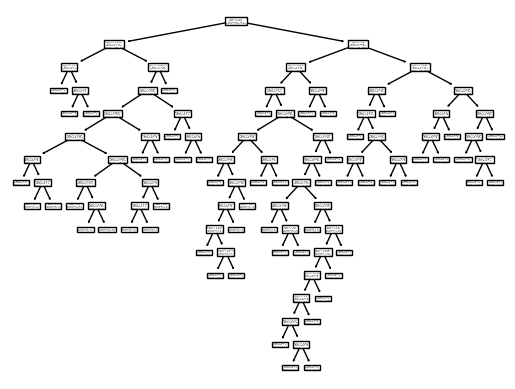

In [ ]:
tree.plot_tree(Dtree1); #Plot สำหรับดูต้นไม้

## Test
ทดสอบหรือนำมาทำนาย

In [ ]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
y_predict = Dtree1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_predict) #พบว่าโมเดลนี้สามารถทำนายได้แม่นยำถึง 82.51%

0.825136612021858

#**Set parameter**
กรณีที่ต้องการเซ็ตพารามิเตอร์

## Import

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Deine

In [ ]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=4)

## Train

In [ ]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

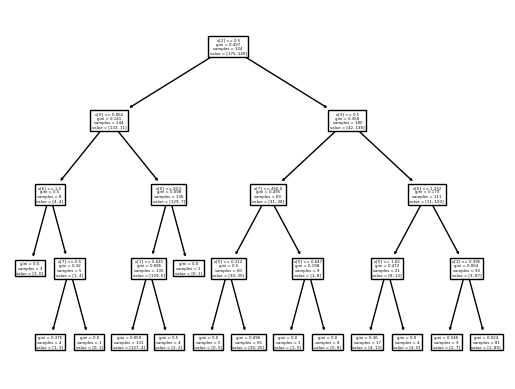

In [ ]:
tree.plot_tree(Dtree2);

## Test

In [ ]:
y_predict2 = Dtree2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict2) # Set parameter พบว่าโมเดลทำนายแม่นยำถึง 85.79%

0.8579234972677595

#**HW5**
Build a decision tree model which hass better than 0.86 and describe about parameters you set

## Define

In [ ]:
Dtree3 = DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_split = 10)

## Train

In [ ]:
Dtree3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=0)

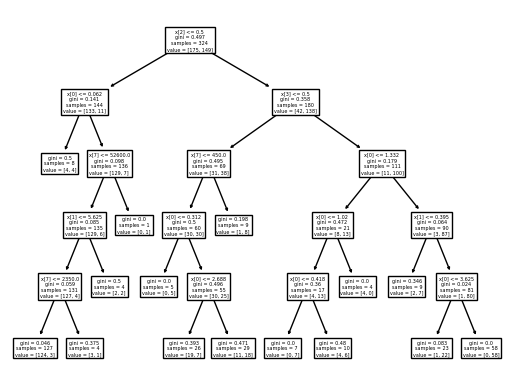

In [ ]:
tree.plot_tree(Dtree3);

## Test

In [ ]:
y_predict3 = Dtree3.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict3) พบว่าโมเดลนี้สามารถทำนายได้แม่นยำถึง 87.98%

0.8797814207650273

-----------------------

#**HW6**
- Build a decision tree model 3 Models
- Naive Bayes 1 Models
- Unique Technique (Linear Discriminant Analysis (LDA) ) 1 Models


## Build a decision tree model 3 Models

In [ ]:
credit.head()

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1


### Set new data to split train and test

In [ ]:
np.random.seed(seed = 789)

In [ ]:
a = np.random.randint(2, size = len(credit))
a

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
newtrain = credit [a==1]
newtrain.shape

(349, 9)

In [ ]:
newtest = credit [a==0]
newtest.shape

(341, 9)

### set data

In [ ]:
newX_train = newtrain.iloc[:,:-1]
newy_train = newtrain.iloc[:,-1]
newX_test = newtest.iloc[:,:-1]
newy_test = newtest.iloc[:,-1]

## โมเดลที่ 1 ของ Decision Tree


### Define

In [ ]:
NDtree1 = DecisionTreeClassifier(random_state=0,max_depth=4)

### Train

In [ ]:
NDtree1.fit(newX_train,newy_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

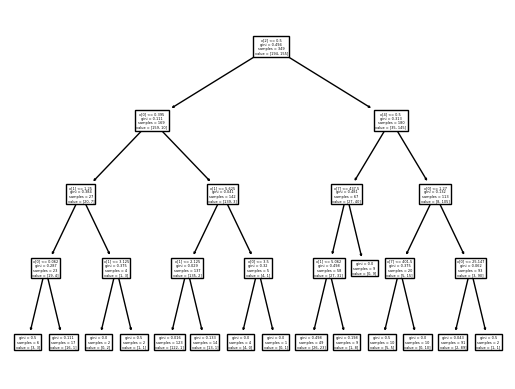

In [ ]:
tree.plot_tree(NDtree1);

### Test

In [ ]:
y_predictnt1 = NDtree1.predict(newX_test)

In [ ]:
accuracy_score(newy_test, y_predictnt1)

0.8181818181818182

## โมเดลที่ 2 ของ Decision Tree

### Define

In [ ]:
NDtree2 = DecisionTreeClassifier(criterion ='log_loss',random_state=0,max_depth=4)

### Train

In [ ]:
NDtree2.fit(newX_train,newy_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=0)

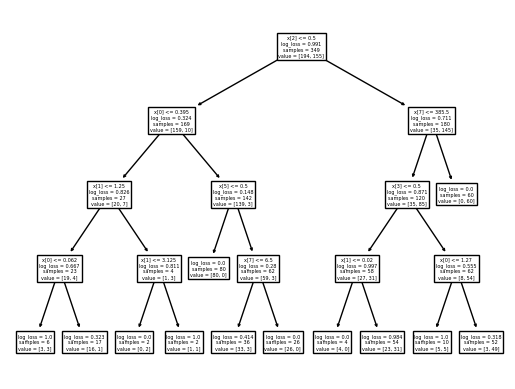

In [ ]:
tree.plot_tree(NDtree2);

### Test

In [ ]:
y_predictnt2 = NDtree2.predict(newX_test)

In [ ]:
accuracy_score(newy_test, y_predictnt2)

0.8123167155425219

## โมเดลที่ 3 ของ Decision Tree

### Define

In [ ]:
NDtree3 = DecisionTreeClassifier(criterion ='entropy',random_state=0,max_depth=5,min_samples_split=40)

### Train

In [ ]:
NDtree3.fit(newX_train,newy_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=40,
                       random_state=0)

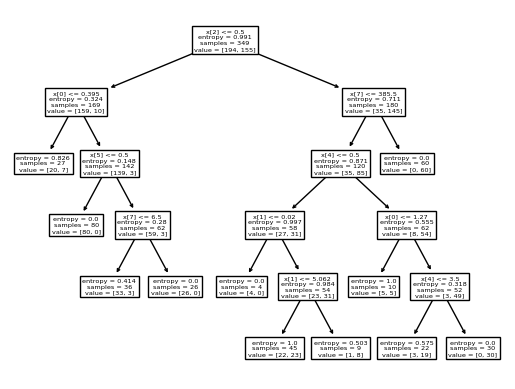

In [ ]:
tree.plot_tree(NDtree3);

### Test

In [ ]:
y_predictnt3 = NDtree3.predict(newX_test)

In [ ]:
accuracy_score(newy_test, y_predictnt3)

0.8152492668621701

---

##Naive Bayes 1 Models
(Gausian Naive bayes)

### Import

In [ ]:
from sklearn.naive_bayes import GaussianNB

### Define

In [ ]:
gnb = GaussianNB()

### Train

In [ ]:
gnb.fit(newX_train, newy_train)

GaussianNB()

### Test

In [ ]:
y_prednb = gnb.predict(newX_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(newy_test, y_prednb)

0.7917888563049853

---

## Unique Technique 1 Models
(Linear Discriminant Analysis (LDA) )

### Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

### Define

In [ ]:
lda = LinearDiscriminantAnalysis()

### Train

In [ ]:
lda.fit(newX_train, newy_train)

LinearDiscriminantAnalysis()

### Test

In [ ]:
y_predlda = lda.predict(newX_test)

In [ ]:
accuracy_score(newy_test, y_predlda)

0.841642228739003

---